In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV 
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import StandardScaler

In [35]:
df = pd.read_csv("Data/Residential-Building-Data-Set.csv", header = 1)

In [36]:
df.head()

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,...,V-22.4,V-23.4,V-24.4,V-25.4,V-26.4,V-27.4,V-28.4,V-29.4,V-9,V-10
0,81.0,1.0,85.0,1.0,1.0,3150.0,920.0,598.5,190.0,1010.84,...,815.50,1755.00,8002.0,60.74,54.26,2978.26,41407.0,601988.1,2200.0,410.0
1,84.0,1.0,89.0,4.0,1.0,7600.0,1140.0,3040.0,400.0,963.81,...,1316.30,8364.78,8393.0,90.95,89.79,11379.37,44835.0,929027.1,5000.0,1000.0
2,78.0,1.0,81.0,4.0,1.0,4800.0,840.0,480.0,100.0,689.84,...,765.80,1755.00,4930.0,38.70,32.04,1653.06,37933.0,377828.6,1200.0,170.0
3,72.0,2.0,73.0,2.0,1.0,685.0,202.0,13.7,20.0,459.54,...,152.25,1442.31,1456.0,9.73,8.34,686.16,8194.0,122031.7,165.0,30.0
4,87.0,1.0,90.0,2.0,1.0,3000.0,800.0,1230.0,410.0,631.91,...,2244.10,9231.76,9286.0,136.60,140.20,9821.00,48260.0,1734973.5,5500.0,700.0


In [37]:
print(df.shape)
print(df.describe())

(372, 109)
       START YEAR  START QUARTER  COMPLETION YEAR  COMPLETION QUARTER  \
count  372.000000     372.000000       372.000000          372.000000   
mean    81.483871       2.190860        82.951613            2.586022   
std      4.182141       1.083382         4.223898            1.123442   
min     72.000000       1.000000        73.000000            1.000000   
25%     78.000000       1.000000        80.000000            2.000000   
50%     82.000000       2.000000        84.000000            3.000000   
75%     85.000000       3.000000        87.000000            4.000000   
max     88.000000       4.000000        90.000000            4.000000   

              V-1           V-2          V-3          V-4         V-5  \
count  372.000000    372.000000   372.000000   372.000000  372.000000   
mean     9.728495   1729.044355   426.114247   327.904086  163.118280   
std      6.563309   1802.371491   490.076498   563.544337  112.604343   
min      1.000000    200.000000    60.0

- Split Data into X and y subsets. X being the entire data frame without V-9 and V-10 and y being the target column of V-10. 
- We removed V-9 because it is the final sales price which can leak data about V-10 which violates our ML golden rule

In [38]:
X = df.drop(columns = ['V-9', 'V-10'])
y = df['V-10']

Split data into #80 , #20 Training, testing split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state = 42)

Performing Exploratory Data Analysis

Text(0, 0.5, 'Frequency')

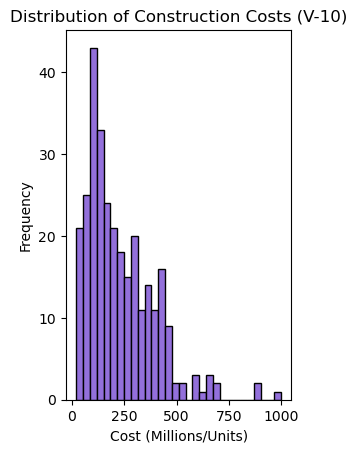

In [45]:
# Plot A: Target Distribution (Histogram)
# This shows if costs are normally distributed or skewed.
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=30, color='mediumpurple', edgecolor='black')
plt.title("Distribution of Construction Costs (V-10)")
plt.xlabel("Cost (Millions/Units)")
plt.ylabel("Frequency")

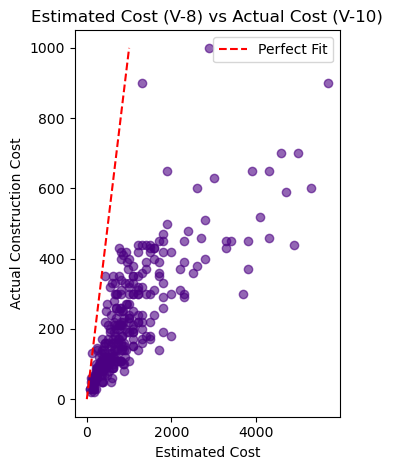

In [46]:
# Plot B: Scatter Plot
# This checks the relationship between Estimate (V-8) and Actual (V-10).
# If the dots follow the red line, the estimate is a good predictor.
plt.subplot(1, 2, 2)
plt.scatter(X_train['V-8'], y_train, alpha=0.6, color='indigo')
plt.plot([0, y_train.max()], [0, y_train.max()], 'r--', label='Perfect Fit')
plt.title("Estimated Cost (V-8) vs Actual Cost (V-10)")
plt.xlabel("Estimated Cost")
plt.ylabel("Actual Construction Cost")
plt.legend()

plt.tight_layout()
plt.show()

Synthetic Data Generation using Kernel Density Estimation 

Based off of this plot we're seeing that estimations are generally being pretty well predictors to the actual costs based on the trend of the data. There are however outliers. 

Next phase is creating our synthetic data

In [56]:
#Prepare Data
train_data_combined = pd.concat([X_train, y_train], axis = 1)
scaler_gen = StandardScaler()
trained_data_scaled = scaler_gen.fit_transform(train_data_combined)

In [57]:
#Fit inside Generator
kde = KernelDensity(kernel ='gaussian', bandwidth = 0.5)
kde.fit(trained_data_scaled)
kde

,bandwidth,0.5
,algorithm,'auto'
,kernel,'gaussian'
,metric,'euclidean'
,atol,0
,rtol,0
,breadth_first,True
,leaf_size,40
,metric_params,None


In [59]:
#Generate 300 new samples
synthetic_scaled = kde.sample(300, random_state = 42)
synthetic_data = scaler_gen.inverse_transform(synthetic_scaled)